In [169]:
import pickle

import pandas as pd
import numpy as np
import seaborn as seaborn 
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
df = pd.read_pickle("../data/processed/pages.pkl")
#df = df.replace(r'^\s*$', np.nan, regex=True)

In [229]:
df_backup = df.copy()

In [230]:
df.head(5)

,price,bed,bath,sqft,area,zipcode,address,date_sold,home_type,sqft_price,lot_size,year_built,hoa_fee,all_home_features,tax_amount,description,realtor_description
0,"$309,000",1 Bed,1 Bath,640 sqft,Lakewood,"Seattle, WA 98118",4606 50th Ave S,"Last Sold: Nov 13, 2019",Single Family Home,$483/sqft,"Lot Size: 4,800 sqft",Built in 1910,,"[Single Family Home, $483/sqft, Lot Size: 4,80...","$4,068",This property is no longer available to rent o...,This is a rare opportunity to find an attracti...
1,"$266,500",2 Beds,1 Bath,984 sqft,,"Seattle, WA 98168",14904 32nd Pl S,"Last Sold: Oct 15, 2019",Condo,$271/sqft,Lot Size: 3.66 acres,Built in 1982,,"[Condo, $271/sqft, Lot Size: 3.66 acres, Built...","$2,062",This property is no longer available to rent o...,Updated townhome in extremely convenient locat...
2,"$548,950",3 Beds,1 Bath,"1,480 sqft",South Delridge,"Seattle, WA 98106",2206 SW Elmgrove St,"Last Sold: Apr 14, 2020",Condo,$371/sqft,"Lot Size: 1,470 sqft",Built in 2010,,"[Condo, $371/sqft, Lot Size: 1,470 sqft, Built...","$4,677",This property is no longer available to rent o...,Fantastic well kept town home conveniently loc...
3,"$740,000",4 Beds,2 Baths,"2,855 sqft",Woodmont,"Seattle, WA 98198",731 Woodmont Beach Rd S,"Last Sold: Jan 9, 2020",Single Family Home,$259/sqft,"Lot Size: 9,083 sqft",Built in 1919,,"[Single Family Home, $259/sqft, Lot Size: 9,08...","$7,568",This property is no longer available to rent o...,GATED PUGET SOUND VIEW HOME! Don't miss an opp...
4,"$595,000",4 Beds,1 Bath,"1,830 sqft",Highland Park,"Seattle, WA 98106",9256 11th Ave SW,"Last Sold: Feb 13, 2020",Single Family Home,$325/sqft,"Lot Size: 7,620 sqft",Built in 1963,,"[Single Family Home, $325/sqft, Lot Size: 7,62...","$1,455",This property is no longer available to rent o...,Bright shining SHOP! Yes 7 miles from downtown...


In [249]:
def convert_integer(df, feature):
    if type(df[feature][0]) == str:
        df[feature] = pd.to_numeric(df[feature].replace('[^0-9\.]', '', regex=True), errors='coerce').astype(float)
    else:
        print(f'{feature} is already {df[feature].dtype}' )
    

In [257]:
df['lot_size_units'] = df['lot_size'].apply(lambda x: 'acre' if 'acre' in x else 'sqft' if 'sqft' in x else '' )
for column in ['price', 'bed', 'bath', 'sqft', 'zipcode', 'year_built', 'tax_amount', 'sqft_price', 'hoa_fee', 'lot_size']:
    convert_integer(df=df, feature=column)

In [271]:
df['date_sold'] = pd.to_datetime(df['date_sold'].str.replace('Last Sold:', '', regex=False), errors='coerce')

In [272]:
df.head()

,price,bed,bath,sqft,area,zipcode,address,date_sold,home_type,sqft_price,lot_size,year_built,hoa_fee,all_home_features,tax_amount,description,realtor_description,lot_size_units
0,309000.0,1.0,1.0,640.0,Lakewood,98118.0,4606 50th Ave S,2019-11-13,Single Family Home,483.0,4800.00,1910.0,NaN,"[Single Family Home, $483/sqft, Lot Size: 4,80...",4068.0,This property is no longer available to rent o...,This is a rare opportunity to find an attracti...,sqft
1,266500.0,2.0,1.0,984.0,,98168.0,14904 32nd Pl S,2019-10-15,Condo,271.0,3.66,1982.0,NaN,"[Condo, $271/sqft, Lot Size: 3.66 acres, Built...",2062.0,This property is no longer available to rent o...,Updated townhome in extremely convenient locat...,acre
2,548950.0,3.0,1.0,1480.0,South Delridge,98106.0,2206 SW Elmgrove St,2020-04-14,Condo,371.0,1470.00,2010.0,NaN,"[Condo, $371/sqft, Lot Size: 1,470 sqft, Built...",4677.0,This property is no longer available to rent o...,Fantastic well kept town home conveniently loc...,sqft
3,740000.0,4.0,2.0,2855.0,Woodmont,98198.0,731 Woodmont Beach Rd S,2020-01-09,Single Family Home,259.0,9083.00,1919.0,NaN,"[Single Family Home, $259/sqft, Lot Size: 9,08...",7568.0,This property is no longer available to rent o...,GATED PUGET SOUND VIEW HOME! Don't miss an opp...,sqft
4,595000.0,4.0,1.0,1830.0,Highland Park,98106.0,9256 11th Ave SW,2020-02-13,Single Family Home,325.0,7620.00,1963.0,NaN,"[Single Family Home, $325/sqft, Lot Size: 7,62...",1455.0,This property is no longer available to rent o...,Bright shining SHOP! Yes 7 miles from downtown...,sqft


In [274]:
df.dtypes

price                         float64
bed                           float64
bath                          float64
sqft                          float64
area                           object
zipcode                       float64
address                        object
date_sold              datetime64[ns]
home_type                      object
sqft_price                    float64
lot_size                      float64
year_built                    float64
hoa_fee                       float64
all_home_features              object
tax_amount                    float64
description                    object
realtor_description            object
lot_size_units                 object
dtype: object

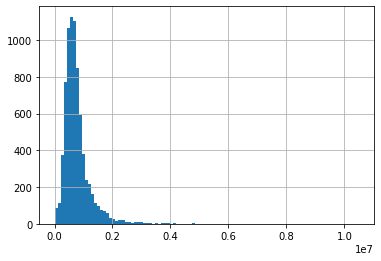

In [281]:
df.price.hist(bins=100)

In [282]:
df.isna().sum()

price                  1000
bed                     706
bath                    683
sqft                    543
area                      0
zipcode                 307
address                   0
date_sold              1144
home_type                 0
sqft_price             1302
lot_size               2083
year_built              618
hoa_fee                7739
all_home_features         0
tax_amount             1073
description               0
realtor_description       0
lot_size_units            0
dtype: int64

In [283]:
df['home_type'].value_counts()

Single Family Home                                                                                                                                  4910
                                                                                                                                                    1149
Condo                                                                                                                                                924
Townhouse                                                                                                                                            583
Multi Family                                                                                                                                         161
                                                                                                                                                    ... 
Parking: MixedParking Spaces: 2Units: 20Construction Type: FrameLand Use Code: Con